In [74]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

### selfmade_dataset 에서 jpg 이미지 하나 다운스케일, 정규화, 흑백 반전 후 확인해보기

(2036, 1440)
(16, 16)
[[252 252 252 252 252 252 253 252 252 252 252 252 252 252 252 252]
 [252 252 252 252 252 252 249 252 252 252 252 252 252 252 252 252]
 [252 252 252 252 253 254 193 250 253 253 253 253 253 252 252 252]
 [252 252 249 248 246 245 174 237 241 241 241 240 246 252 252 252]
 [252 249 231 230 232 231 169 235 234 233 233 230 240 252 252 252]
 [252 252 253 254 255 245 185 255 254 254 254 254 253 252 252 252]
 [252 252 252 252 253 239 187 255 252 252 252 252 252 252 252 252]
 [252 252 252 252 253 243 185 255 252 252 252 252 252 252 252 252]
 [252 252 252 252 253 242 186 255 252 252 252 252 252 252 252 252]
 [252 252 252 252 254 236 192 255 252 252 252 252 252 252 252 252]
 [252 252 252 252 254 237 191 255 252 252 252 252 252 252 252 252]
 [252 252 252 252 253 241 187 255 253 253 252 252 251 252 252 252]
 [252 252 252 252 253 246 186 230 227 226 226 224 230 252 252 252]
 [252 252 252 252 252 252 246 245 248 251 251 252 252 252 252 252]
 [252 252 252 252 252 252 253 253 252 25

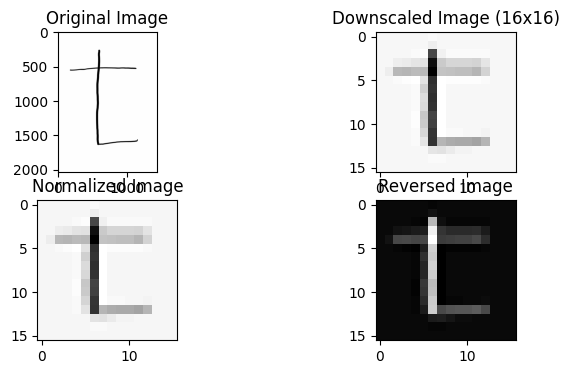

In [75]:
# 원본 손글씨 test 이미지 
original_image_path = "selfmade_dataset/t1.jpg"
original_image = Image.open(original_image_path).convert("L")
original_image_array = np.array(original_image)
print(original_image_array.shape)   # (2036, 1440)

# 이미지 다운스케일
downscaled_image = original_image.resize((16,16))
downscaled_image_array = np.array(downscaled_image).astype(np.int16)
print(downscaled_image_array.shape) # (16, 16)
print(downscaled_image_array)

# 이미지 정규화 (174~255) -> (0~255)
normalized_image_array = (np.round((downscaled_image_array - np.min(downscaled_image_array)) * 255 / (255 - np.min(downscaled_image_array)))).astype(np.int16)
print(normalized_image_array)

# 흑백 반전
reversed_image_array = 255 - normalized_image_array
print(reversed_image_array)

# 이미지 표시
plt.figure(figsize=(8, 4))

plt.subplot(2, 2, 1)
plt.imshow(original_image_array, cmap='gray')
plt.title("Original Image")

plt.subplot(2, 2, 2)
plt.imshow(downscaled_image_array, cmap='gray')
plt.title("Downscaled Image (16x16)")

plt.subplot(2, 2, 3)
plt.imshow(normalized_image_array, cmap='gray')
plt.title("Normalized Image")

plt.subplot(2, 2, 4)
plt.imshow(reversed_image_array, cmap='gray')
plt.title("Reversed Image")

plt.show()

### selfmade_dataset 전처리 후 test.csv 에 쓰기

In [76]:
import os
import csv

test_csv = open("test.csv", 'w', newline='')
csv_writer = csv.writer(test_csv)
for file in os.listdir("selfmade_dataset"):
    original_image_path = "selfmade_dataset/"+file
    original_image = Image.open(original_image_path).convert("L")
    # 이미지 다운스케일
    downscaled_image = original_image.resize((16,16))
    downscaled_image_array = np.array(downscaled_image).astype(np.int16)
    # 이미지 정규화
    normalized_image_array = (np.round((downscaled_image_array - np.min(downscaled_image_array)) * 255 / (255 - np.min(downscaled_image_array)))).astype(np.int16)
    # 흑백 반전
    reversed_image_array = 255 - normalized_image_array
    image_list = reversed_image_array.reshape(16*16).tolist()
    csv_writer.writerow([ord(file[0])-96] + image_list)  # file[0]을 ord로 바꿔 정수 label 붙이고 csv에 저장
test_csv.close()

### 저장된 test 이미지 확인 (test.csv)

20 ['9', '9', '9', '9', '9', '9', '6', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '18', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '6', '3', '184', '15', '6', '6', '6', '6', '6', '9', '9', '9', '9', '9', '18', '21', '27', '30', '240', '53', '42', '42', '42', '44', '27', '9', '9', '9', '9', '18', '71', '74', '68', '71', '255', '59', '62', '65', '65', '74', '44', '9', '9', '9', '9', '9', '6', '3', '0', '30', '208', '0', '3', '3', '3', '3', '6', '9', '9', '9', '9', '9', '9', '9', '6', '47', '202', '0', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '6', '36', '208', '0', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '6', '39', '205', '0', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '3', '56', '187', '0', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '3', '53', '190', '0', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '6', '42', '202', '0', '6', '6', '9', '9', '12', 

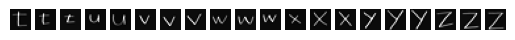

In [77]:
test_data_file = open("test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()
for i in range(20):
    test_data = test_data_list[i].split(',')    # 0번 인덱스가 label, 16*16개의 길이가 image 데이터
    label = test_data[0]
    image = test_data[1:]
    print(label, image)
    image_array = np.array(image, dtype='int16').reshape(16,16)
    plt.subplot(1,20,i+1)
    plt.imshow(image_array, cmap='gray')
    plt.axis('off')
plt.show()

### EMNIST train 이미지 확인 (emnist-letters-train.csv)

88800
23 ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '20', '114', '125', '82', '37', '37', '39', '115', '157', '94', '21', '10', '32', '37', '37', '37', '37', '37', '37', '37', '82', '125', '114', '20', '0', '0', '0', '3', '109', '245', '249', '233', '217', '217', '217', '245', '251', '234', '172', '142', '203', '217', '217', '217', '217', '217', '217', '217', '233', '249', '245', '109', '3', '0', '0', '4', '114', '253', '254', '254', '254', '254', '254', '254', '254', '254', '252', '251', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '127', '4', '0', '0', '0', '45', '214', '

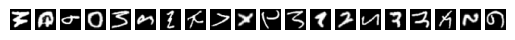

In [78]:
# https://www.kaggle.com/datasets/crawford/emnist/
train_data_file = open("emnist-letters-train.csv", 'r')
train_data_list = train_data_file.readlines()
train_data_file.close()
print(len(train_data_list)) # 697932개 이미지
for i in range(20):
    train_data = train_data_list[i].split(',')    # 0번 인덱스가 label, 28*28개의 길이가 image 데이터
    label = train_data[0]
    image = train_data[1:]
    print(label, image)
    image_array = np.array(image, dtype='int16').reshape(28,28)
    plt.subplot(1,20,i+1)
    plt.imshow(image_array, cmap='gray')
    plt.axis('off')
plt.show()

### EMNIST train 이미지 전처리 후 train.csv 에 쓰기

In [87]:
# 이미지가 돌아가있어서 회전을 시켜줘야 한다.
# EMNIST train 이미지의 모양을 (28, 28) -> (16, 16)으로 바꿔야 한다.
# EMNIST traind 에서 t, u, v, w, x, y, z 만 추출
# 20, 21, 22, 23, 24, 25, 26
# train.csv 에 쓰기
train_data_file = open("emnist-letters-train.csv", 'r')
train_data_list = train_data_file.readlines()
train_data_file.close()
train_csv = open("train.csv", 'w', newline='')
csv_writer = csv.writer(train_csv)
for i in range(len(train_data_list)):
    train_data = train_data_list[i].split(',')
    label = train_data[0]
    image = train_data[1:]
    if 20 <= int(label) <= 26:
        original_image_array = np.array(image).reshape(28, 28).astype(np.int16).T
        original_image = Image.fromarray(original_image_array)
        downscaled_image = original_image.resize((16,16))
        downscaled_image_array = np.array(downscaled_image)
        downscaled_image_list = downscaled_image_array.reshape(16*16).tolist()
        csv_writer.writerow([label] + downscaled_image_list)
train_csv.close()
        

### EMNIST train 이미지 확인 (train.csv)

24017
23 ['0', '-1', '-4', '-6', '-1', '0', '0', '-1', '-3', '0', '0', '0', '0', '0', '0', '0', '-2', '8', '111', '102', '3', '0', '-1', '1', '12', '-2', '0', '0', '-2', '-2', '0', '0', '-5', '28', '226', '241', '27', '-3', '-5', '77', '179', '39', '-4', '-5', '10', '10', '-2', '0', '-2', '8', '185', '256', '75', '-10', '31', '209', '268', '142', '-15', '64', '190', '167', '15', '-2', '-1', '1', '173', '262', '111', '-10', '109', '256', '263', '187', '55', '203', '272', '187', '8', '-2', '-4', '28', '216', '264', '134', '54', '232', '258', '256', '246', '238', '259', '243', '83', '-7', '0', '-4', '23', '203', '264', '158', '156', '264', '259', '255', '256', '259', '251', '110', '3', '-1', '0', '0', '-4', '132', '260', '249', '255', '233', '183', '251', '256', '259', '172', '2', '-2', '0', '0', '-1', '1', '165', '261', '256', '259', '157', '37', '232', '259', '259', '111', '-6', '0', '0', '0', '-1', '2', '175', '261', '260', '220', '29', '21', '232', '261', '231', '54', '-4', '0', '0', 

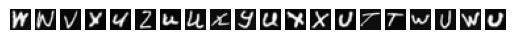

In [88]:
train_data_file = open("train.csv", 'r')
train_data_list = train_data_file.readlines()
train_data_file.close()
print(len(train_data_list)) # 60718개 이미지
for i in range(20):
    train_data = train_data_list[i].split(',')    # 0번 인덱스가 label, 28*28개의 길이가 image 데이터
    label = train_data[0]
    image = train_data[1:]
    print(label, image)
    image_array = np.array(image, dtype='int16').reshape(16,16)
    plt.subplot(1,20,i+1)
    plt.imshow(image_array, cmap='gray')
    plt.axis('off')
plt.show()